In [1]:
#Minh Nguyen - cgv646
#Project 2

#all imports
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn

In [3]:
#I have mine alredy unzipped so I did not call this function
zipfile.ZipFile('weather.zip').extractall('.')

In [5]:
ls weather

RSM00030710.dly  USW00022536.dly  project2.ipynb   stations.txt
USW00014922.dly  USW00023188.dly  readme.txt       weather.README


In [7]:
#Path1 = minneapolis
path1 = "weather/USW00014922.dly"
#path2 = San Diego
path2 = "weather/USW00023188.dly"
open(path1, 'r').readlines()[:10]

['USW00014922193804TMAX-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     106  0  189  0  172  0  217  0  256  0  194  0  117  0  133  0  228  0  217  0  172  0  144  0   89  0  144  0   94  0  111  0  156  0  267  0  256  0  156  0  144  0  222  0-9999   \n',
 'USW00014922193804TMIN-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999     -17  0   11  0   61  0   28  0   78  0   78  0   72  0  106  0  106  0   72  0   11  0   -6  0   17  0   -6  0   39  0   56  0   44  0  117  0  156  0   39  0   17  0   44  0-9999   \n',
 'USW00014922193804PRCP-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0  0    0  0    0  0    0  0    0  0  267  0   64  0  193  0   58  0    0  0    0T 0    3  0   25  0    0  0  119  0   10  0    0T 0    0  0   36  0   56  0    0  0    0  0-9999   \n',
 'USW00014922193804SNOW-9999   -9999   -9999   -9999   -9999   -9999   -9999   -9999       0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [9]:
open('weather/readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [11]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [13]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [15]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [17]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [19]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')

    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [21]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [23]:
minn = parsefile(path1)
minn

array([(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106,   189,   172,   217,   256,   194,   117,   133,   228,   217,   172,   144,    89,   144,  94,   111,   156,   267,   256,   156,   144,   222, -9999),
       (1938, 4, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -17,    11,    61,    28,    78,    78,    72,   106,   106,    72,    11,    -6,    17,    -6,  39,    56,    44,   117,   156,    39,    17,    44, -9999),
       (1938, 4, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   0,     0,     0,     0,     0,   267,    64,   193,    58,     0,     0,     3,    25,     0, 119,    10,     0,     0,    36,    56,     0,     0, -9999),
       ...,
       (2015, 9, 'WT01',     1,     1,     1,     1,     1,     1, -9999,     1,   1,     1, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999, -9999, -9999, -9999,     1,   1,     1,     1,     1, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT03', -9999, 

In [24]:
minn_TMAX = getobs(path1, 'TMAX')
minn_TMIN = getobs(path1, 'TMIN')

In [26]:
fillnans(minn_TMAX)
minn_TMAX_all = np.vstack([selectyear(minn_TMAX, year)[:365] for year in range(1940, 2015)])
minn_TMAX_all

array([[-13.9, -12.8, -12.2, ...,   1.1,   1.7,   1.1],
       [  1.7,   0.6,  -8.3, ...,  -5.6,  -2.2,  -8.9],
       [ -8.9, -14.4, -15. , ...,  -6.1,  -6.7,  -2.2],
       ...,
       [  1.1,  -6.7,  -1.7, ...,  -3.3,  -7.2,  -3.9],
       [ -6.7,  -6.1,  -5.6, ...,  -6.6, -16.6, -18.2],
       [-17.1, -15.5,  -1.6, ..., -12.1, -15.5, -10.5]])

In [27]:
minn_rec_max = np.max(minn_TMAX_all, axis = 1)
minn_rec_min = np.min(minn_TMAX_all, axis = 1)
minn_TMAX_mean = np.mean(minn_TMAX_all, axis=1)
minn_TMAX_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

In [31]:
years = [1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
         1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
         1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
         1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
         1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
         1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
         2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
         2010, 2011, 2012, 2013, 2014]



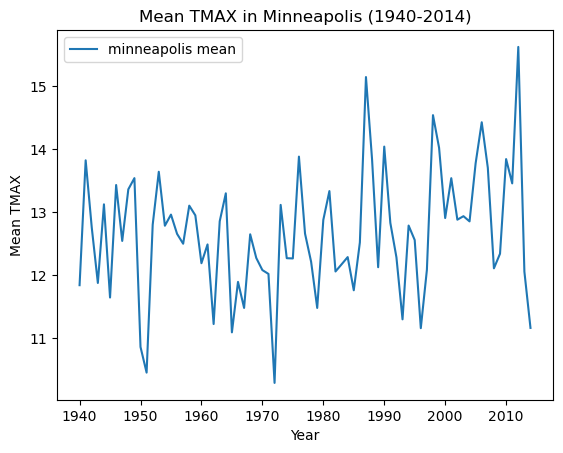

In [33]:
fillnans(minn_TMAX)
minn_TMAX_all = np.vstack([selectyear(minn_TMAX, year)[:365] for year in range(1940, 2015)])
minn_TMAX_mean = np.mean(minn_TMAX_all, axis=1)

# Plotting the mean TMAX

plt.plot(years, minn_TMAX_mean, label = "minneapolis mean")
plt.title('Mean TMAX in Minneapolis (1940-2014)')
plt.xlabel('Year')
plt.ylabel('Mean TMAX')
plt.legend()
plt.show()

In [35]:
dat = selectyear(minn_TMAX, 2012)
minn_warmest = years[np.argmax(minn_TMAX_mean)]
minn_warmest

2012

In [37]:
minneapolis_tmax_warmest_year_2012 = selectyear(minn_TMAX, minn_warmest)
minneapolis_tmax_warmest_year_2012

array([  1.1,  -6.7,  -1.7,   2.8,   7.2,   7.8,   2.8,   4.4,   9.4,
        11.1,   3.3, -10. , -10.6,  -6.1,   4.4,   0. ,  -6.7,  -3.3,
       -15.6, -11.1,  -5.6,  -3.3,  -3.3,  -4.4,   0. ,   4.4,   2.2,
        -2.2,  -5.6,   6.7,   7.2,   0. ,   2.2,   0.6,   2.2,  -1.1,
         7.8,   0. ,   0.6,   3.3,  -2.2,  -6.1,   0. ,  -0.6,   1.1,
         2.2,   5. ,   6.1,   2.8,   6.7,   6.7,   1.7,   1.7,   3.9,
        -1.1,  -2.2,   3.9,  -1.1,   0.6,   1.1,   2.2,   1.7,  -2.2,
        -1.7,   1.7,  15.6,  12.2,   2.8,   1.1,  18.9,  18.9,  11.1,
        19.4,  22.8,  17.2,  26.1,  26.7,  26.1,  26.1,  18.3,  18.9,
        21.1,  22.8,  21.1,  14.4,   8.3,  20. ,  12.2,  16.1,  10. ,
        10. ,  19.4,  21.1,  17.8,  16.7,  15. ,  16.1,  13.9,  16.1,
         8.9,   6.7,  12.2,  17.2,  11.7,  22.8,  23.9,   8.9,  14.4,
        17.2,   8.3,  14.4,  11.1,  13.3,  18.3,  22.8,  22.8,  13.3,
        13.3,  10.6,  13.9,  17.2,  23.3,  27.2,  26.7,  23.3,  15.6,
        17.8,  18.9,

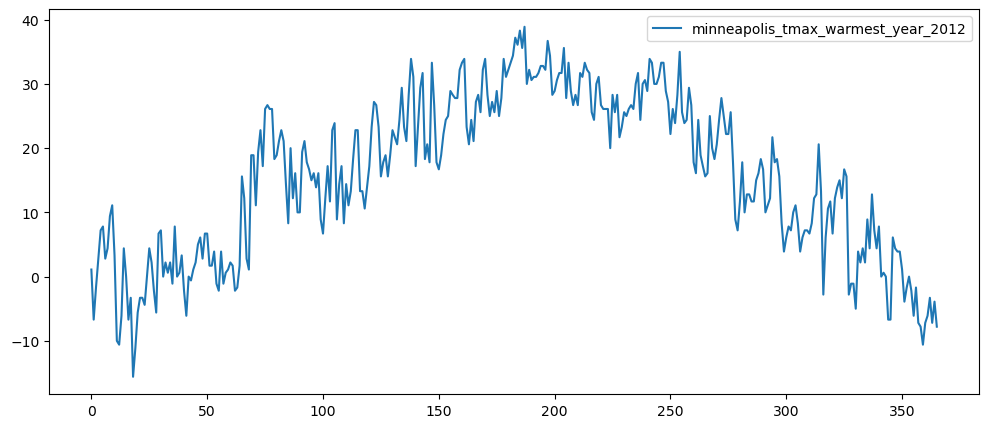

In [39]:
plt.figure(figsize=(12,5))
plt.plot(minneapolis_tmax_warmest_year_2012, label='minneapolis_tmax_warmest_year_2012')
plt.legend(loc='best')

In [41]:
san_diego = parsefile('weather/USW00023188.dly')
san_diego

array([(1939, 7, 'TMAX',   244,   233,   217,   217,   222,   222,   239,   239,   244,   244,   267,   261,   228,   233, 217,   211,   206,   222,   233,   233,   250,   244,   244,   256,   261,   256,   239,   250,   239,   244,   244),
       (1939, 7, 'TMIN',   172,   183,   167,   172,   178,   183,   161,   172,   183,   183,   172,   178,   172,   167, 156,   150,   156,   167,   156,   189,   172,   178,   178,   183,   194,   178,   178,   172,   183,   183,   189),
       (1939, 7, 'PRCP',     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,   0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0),
       ...,
       (2015, 9, 'WSF5',    72,    76,    76,    81,    81,    76,    81,    94,   103,    72,    58,    72,    63,    76, 125,    76,    81, -9999,    63,    98,    89,    67,    76,    67,    67,    63, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT01',

In [43]:
SD_TMIN = getobs(path2,'TMIN')
SD_TMAX = getobs(path2,'TMAX')
SD_TMIN

array([('1939-07-01', 17.2), ('1939-07-02', 18.3), ('1939-07-03', 16.7),
       ..., ('2015-09-28',  nan), ('2015-09-29',  nan),
       ('2015-09-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [44]:
fillnans(SD_TMIN)
SD_TMIN

array([('1939-07-01', 17.2), ('1939-07-02', 18.3), ('1939-07-03', 16.7),
       ..., ('2015-09-28', 21.7), ('2015-09-29', 21.7),
       ('2015-09-30', 21.7)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [45]:
SD_TMIN_ALL = np.vstack([selectyear(SD_TMIN,year)[:365] for year in range(1940, 2014+1)])
SD_TMIN_ALL

array([[13.9, 12.8, 14.4, ..., 10. , 12.2, 11.7],
       [ 9.4,  8.3,  7.2, ..., 11.7,  9.4,  9.4],
       [ 5.6,  2.2,  4.4, ...,  9.4,  7.8,  7.2],
       ...,
       [ 8.3,  8.3, 10. , ...,  7.2,  8.9,  7.8],
       [ 7.8,  5.6,  6.1, ...,  8.3,  8.9,  8.3],
       [ 8.3,  8.3,  7.8, ...,  8.9, 11.7,  6.1]])

In [49]:
SD_MEAN = np.mean(SD_TMIN_ALL, axis=1)
SD_MEAN

array([13.36575342, 13.33753425, 12.46356164, 12.86931507, 12.05726027,
       12.68109589, 12.81534247, 12.64493151, 11.66082192, 12.16657534,
       12.72684932, 12.90739726, 12.76410959, 12.87671233, 13.33068493,
       12.90712329, 13.02246575, 14.01452055, 14.33506849, 14.75068493,
       13.25671233, 13.30767123, 12.72273973, 13.15342466, 12.54630137,
       12.93726027, 13.53287671, 13.4709589 , 13.96246575, 14.03945205,
       14.17616438, 13.37232877, 13.92493151, 13.83589041, 13.95452055,
       13.20986301, 15.01342466, 15.11479452, 15.6539726 , 15.02931507,
       15.29945205, 16.17452055, 14.92410959, 16.23315068, 16.39178082,
       14.59561644, 14.14      , 13.8109589 , 13.87808219, 13.80273973,
       13.98465753, 13.5169863 , 14.8830137 , 14.23671233, 13.69643836,
       14.31835616, 14.83890411, 15.1230137 , 14.13123288, 13.40273973,
       14.43808219, 13.93890411, 13.73917808, 14.53835616, 15.09013699,
       14.73643836, 14.76273973, 13.99506849, 14.16246575, 14.42

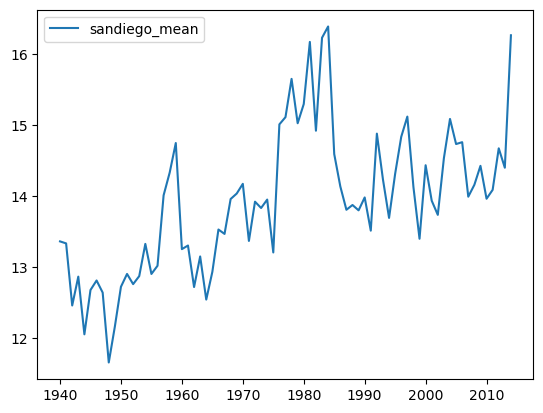

In [51]:
plt.plot(years, SD_MEAN,label='sandiego_mean')
plt.legend(loc='best')

In [53]:
SD_COLDEST = years[np.argmin(SD_MEAN)]
SD_COLDEST

1948

In [55]:
san_diego_tmin_coldest_year_1948 = selectyear(SD_TMIN, SD_COLDEST)
san_diego_tmin_coldest_year_1948

array([ 4.4,  5. , 11.1, 10.6,  8.9,  8.9,  7.8,  8.3, 10. , 10. ,  7.2,
        7.8,  7.8,  8.3,  7.8,  7.2,  5. ,  3.9,  3.9,  5. ,  4.4,  5. ,
        7.8, 11.1, 12.2, 10.6,  4.4,  2.2,  5. ,  4.4,  4.4,  5.6,  6.7,
        6.1,  7.2,  8.3,  7.8,  5.6,  3.3,  5. ,  8.9,  5. ,  3.9,  2.8,
        7.2,  5.6,  7.8, 11.1,  8.9,  8.9,  9.4,  7.8,  9.4,  9.4,  5.6,
        7.8, 10. , 11.1,  9.4,  8.3,  8.3,  6.1, 10. ,  7.2,  5.6,  5.6,
        7.2,  7.8, 11.7, 10.6,  7.2,  7.2,  7.8,  9.4,  9.4,  7.2,  8.9,
        7.8, 10.6,  8.9,  5. ,  7.2,  7.2,  9.4,  8.3,  6.1,  7.8, 11.7,
       12.8, 11.1, 11.7, 12.8, 12.8, 12.2, 10. ,  7.8, 11.1,  8.9,  8.3,
       10. , 11.7, 10. ,  6.7,  8.9, 11.1, 13.9, 14.4, 13.9, 12.8, 12.2,
       12.8, 13.3, 13.3, 13.3, 11.7, 10.6, 13.3, 12.8, 13.3, 11.1,  8.3,
       11.1, 11.1, 10.6, 12.8, 13.9, 13.9, 13.9, 13.3, 11.7, 12.8, 11.7,
       12.2, 12.2, 13.3, 14.4, 12.2, 12.2, 11.1, 11.7, 11.1,  9.4, 11.7,
       13.3, 13.9, 13.3, 13.9, 13.9, 13.3, 12.8, 14

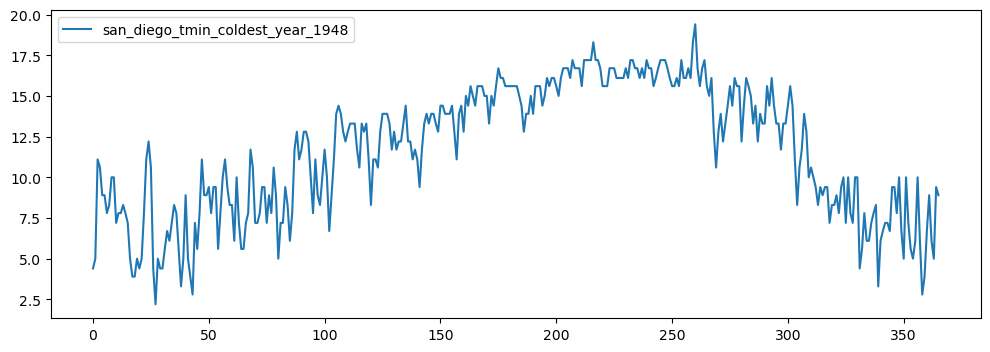

In [57]:
plt.figure(figsize=(12,4))
plt.plot(san_diego_tmin_coldest_year_1948, label='san_diego_tmin_coldest_year_1948')
plt.legend(loc='best')

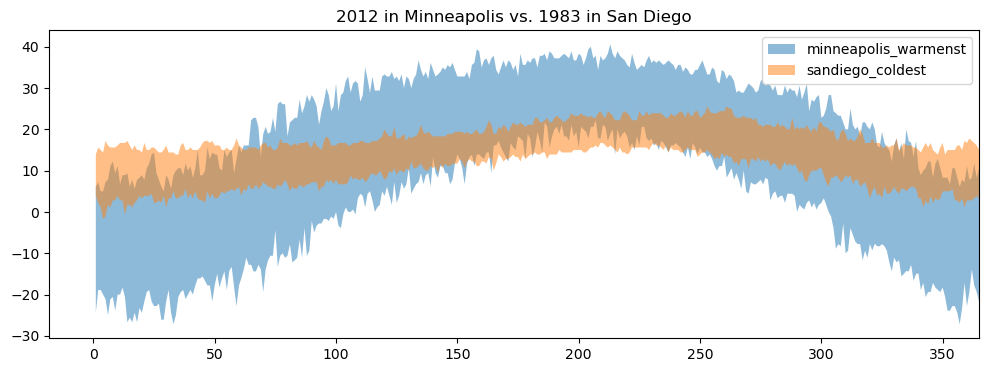

In [59]:
#TASK 4 Minneapolis vs San Diego
plt.figure(figsize=(12,4))
days = np.arange(1,365+1)

plt.fill_between(days, np.min(minn_TMAX_all, axis=0), np.max(minn_TMAX_all, axis=0), alpha=0.5,label='minneapolis_warmenst')
plt.plot(minneapolis_tmax_warmest_year_2012, color = "orange",linestyle='none')

plt.fill_between(days, np.min(SD_TMIN_ALL, axis=0), np.max(SD_TMIN_ALL, axis=0), alpha=0.5, label='sandiego_coldest')
plt.plot(san_diego_tmin_coldest_year_1948, color = "blue",linestyle='none')

plt.title("2012 in Minneapolis vs. 1983 in San Diego")

plt.axis(xmax = 365)
plt.legend(loc='best')